# Lecture 1

## Q 1.1

### Question
let $f_n(x) = \sum\limits_{k=1}^n (-1)^k \dfrac {x^{2k +1}} {(2k + 1)!}$, for $n = 3, 4, \cdots, 7$ calculate zeros near $x = 3$ using newton's method, analyze zeros as n increases.

------

### Solution

**About newton's method for apporximating zeros:**

Ignoring all the maths, the following iteration formula comes out:

$$
x_n = x_{n-1} - \dfrac {f(x_{n-1})} {f^{\prime}(x_{n-1})}
$$

So let's break down the goal:
* create $f$
* create $f^{\prime}$
* create iteration

#### Step one: Declare the function:

> Notes about the following declaration:
> * Inline code is used to save space & time, jupyter magic is another workaround, see [here](https://am111.readthedocs.io/en/latest/jmatlab_use.html)
> * `sysm k` is used to prevent variable not found error, `symsum` would provide value for `k`

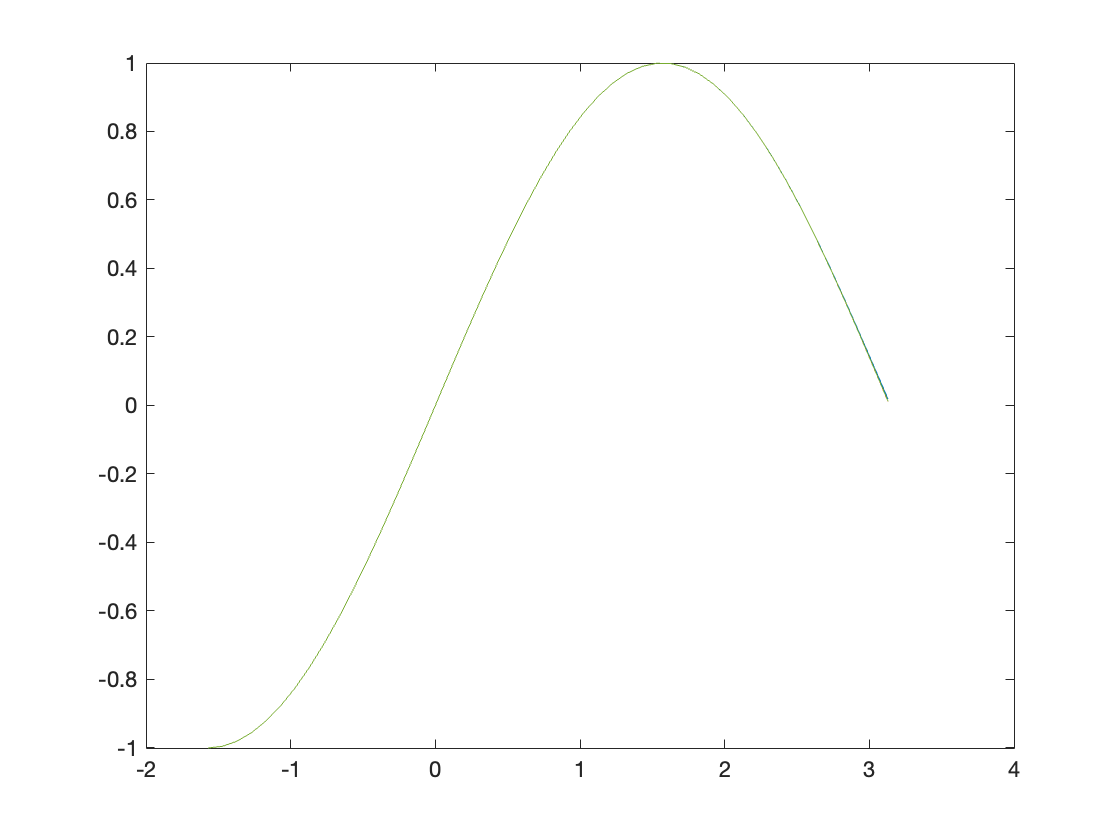

In [1]:
syms k
f = @(n,x) symsum((-1)^k*x.^(2*k+1)/factorial(2*k+1),k,0,n+1);

% Visualization:
x = -pi/2:0.1:pi;
for n=3:7
    y = f(n,x);
    plot(x,y)
    hold on
end
hold off

#### Step two: Create $f^{\prime}$

In [2]:
delta = 1e-10;

In [3]:
div = @(f,x) (f(x+delta)-f(x-delta))/(2*delta);

% test:
square = @(x) x^2;
div(square, 1)
div(square, 2)
div(square, 3)

ans = 2.0000

ans = 4.0000

ans = 6.0000

#### Step three: Create iteration

In [4]:
newton_iteration = @(f, x_n) x_n - f(x_n) / div(f,x_n);

% test:
newton_iteration(square, 2)
newton_iteration(square, 1)
newton_iteration(square, 0.5)
newton_iteration(square, 0.25)

ans = 1.0000

ans = 0.5000

ans = 0.2500

ans = 0.1250

The result is expected since $(x^2)^\prime = 2x$, so
$$
x_n = x_{n-1} - \dfrac {x_{n-1}^2} {2 x_{n-1}} = \frac 12 x_{n-1}
$$

Final loop:

In [5]:
steps = 20;
digits_to_keep = 50;

In [6]:
format long;

for n=1:steps
    f_tmp = @(x) f(n,x);
    x=3.0;
    for c=1:steps
        x = round(newton_iteration(f_tmp, x), digits_to_keep);
    end
    fprintf('[%2.d]: %.50f\n', n, x);
end

[ 1]: 0.00000000000000000000000000000000000000000000000000
[ 2]: 3.07864230448151321439809180446900427341461181640625
[ 3]: 3.14869007146696189280987709935288876295089721679688
[ 4]: 3.14114830541266476515716021822299808263778686523438
[ 5]: 3.14161379828186593243799507035873830318450927734375
[ 6]: 3.14159188080712414858908232417888939380645751953125
[ 7]: 3.14159267600930647290624619927257299423217773437500
[ 8]: 3.14159265306087442937155174149665981531143188476562
[ 9]: 3.14159265360014128276588962762616574764251708984375
[10]: 3.14159265358962258574138104449957609176635742187500
[11]: 3.14159265358979578053322256891988217830657958984375
[12]: 3.14159265358979311599796346854418516159057617187500
[13]: 3.14159265358979311599796346854418516159057617187500
[14]: 3.14159265358979311599796346854418516159057617187500
[15]: 3.14159265358979311599796346854418516159057617187500
[16]: 3.14159265358979311599796346854418516159057617187500
[17]: 3.141592653589793115997963468544185161590576171875

As discovered, as n increases, calculated $x_{n0} \to \pi$. It should as $n\to\infty, f_n \to\sin x$, which have a root of $x_0=\pi$

In [7]:
clear all;

## Q 1.2

### Question
Draw $(\dfrac 1n, \sin(n)),\quad \forall n = 1\cdots +\infty$

For a given $k$, shown what's the nearest point to $A_k = (\dfrac 1k, \sin(k))$ on the graph, connect the graph likewise.

------

### Solution

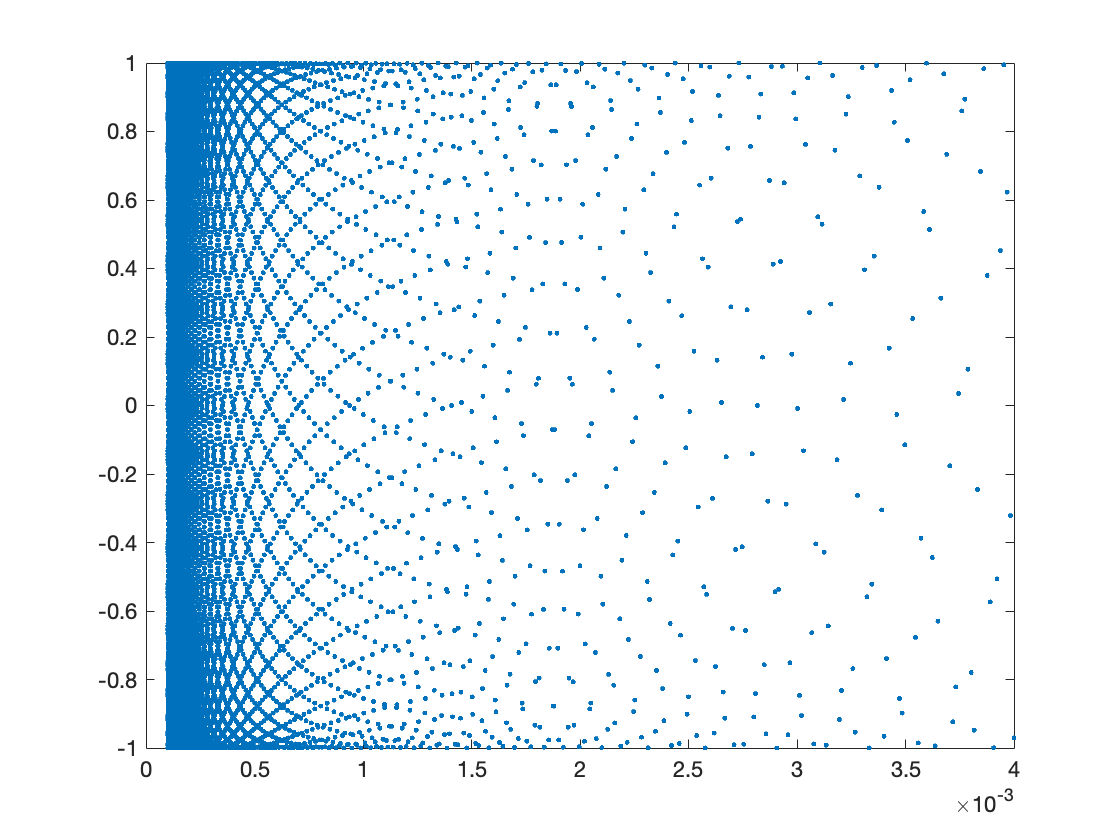

In [8]:
n = 1:10000;
x = 1./n;
y = sin(n);
plot(x,y,'.')
axis([0, 4*10^(-3), -1,1]);

There's not too much to analyze here, the basic solution is described as following:

* for each given $n$, that is to say, emurate $n$, determine $m$ so that $A_n$ and $A_m$ have the closest distance
* connect $A_n$ and $A_m$ on the graph

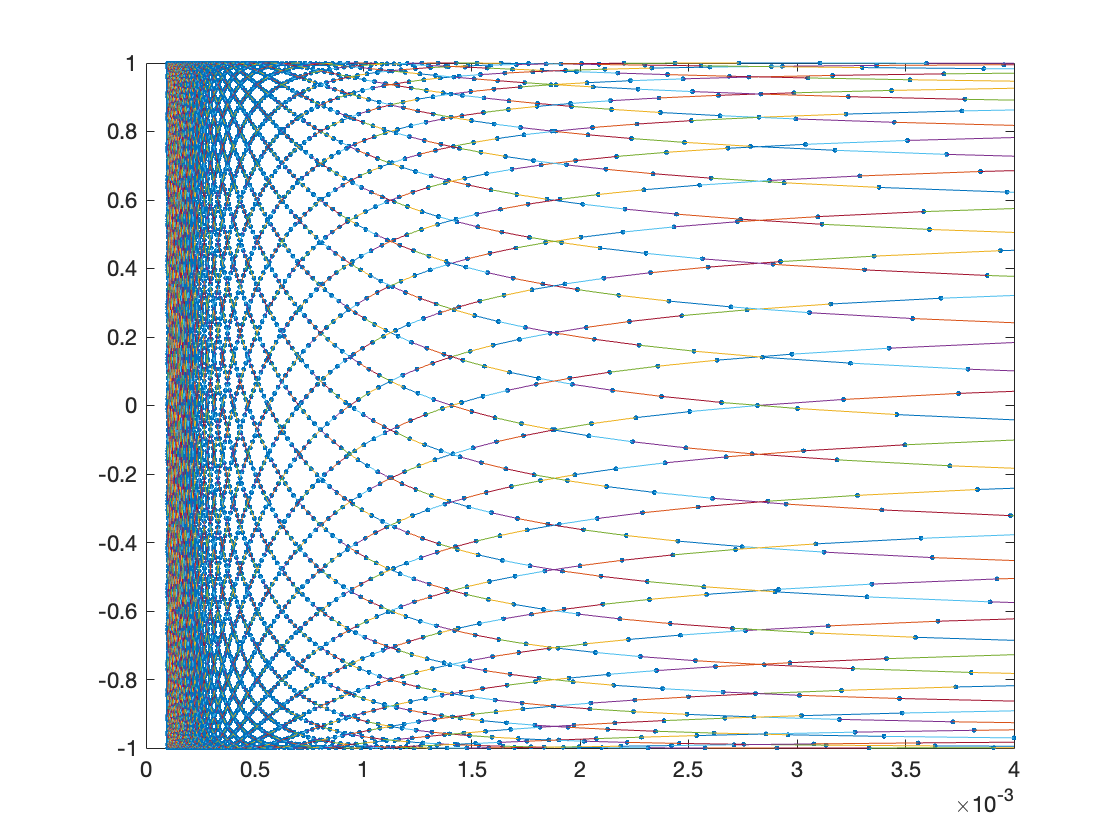

In [5]:
n = 1:10000;
x = 1./n;
y = sin(n);
plot(x,y,'.')
hold on

for n=1:10000
    pointN = [1/n, sin(n)];
    dmin=inf;
    best_m=0;

    % for m=1:10000
    %     pointM = [1/m, sin(m)];
    %     d = sqrt( (pointN(1)-pointM(1))^2 * 10^6 + (pointN(2)-pointM(2))^2 );
    %     if d < dmin & d > 0
    %         dmin = d;
    %         best_m = m;
    %     end
    % end

    % m = best_m;
    m = n + 44;
    pointM = [1/m, sin(m)];

    plot([pointN(1),pointM(1)], [pointN(2),pointM(2)]);
    hold on
end
hold off
axis([0, 4*10^(-3), -1,1]);

Notice here, during the calculation, we used a factor before the x-axis, thie "fix" is used so that "the nearest point on the graph" get connected rather than real distance, here's a demo without the factor:

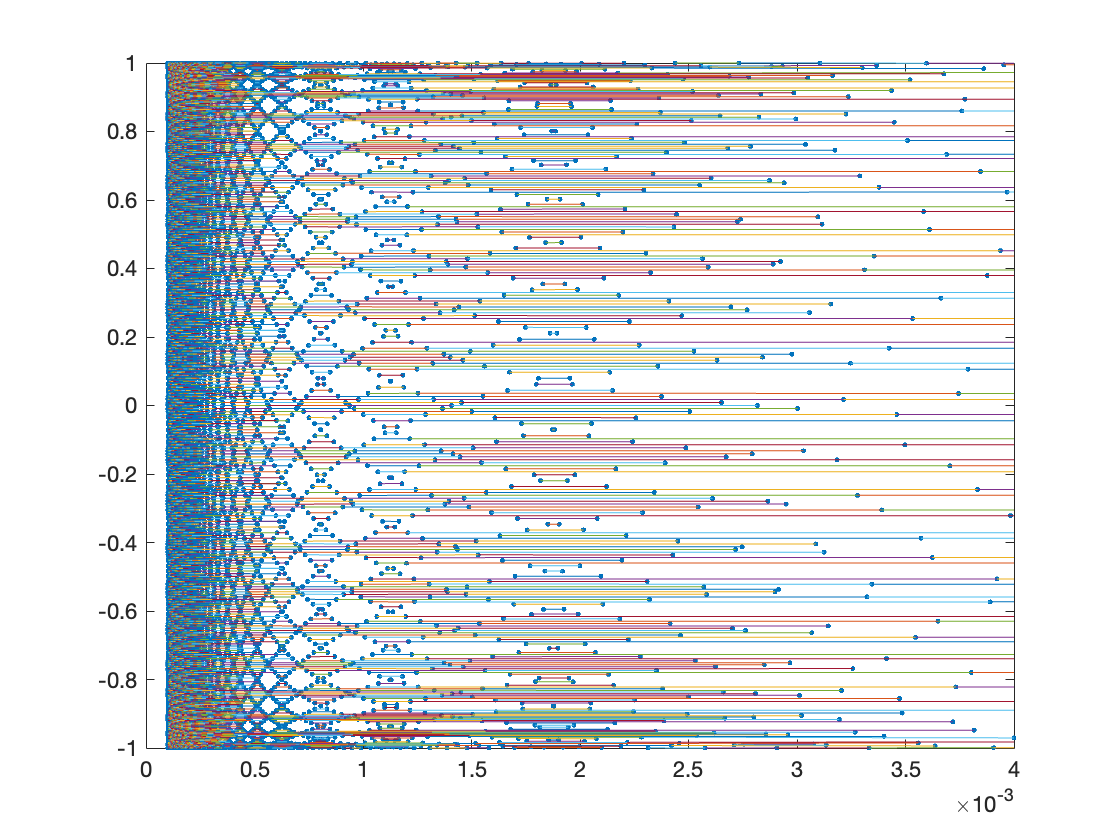

In [10]:
n = 1:10000;
x = 1./n;
y = sin(n);
plot(x,y,'.')
hold on

for n=1:10000
    pointN = [1/n, sin(n)];
    dmin=inf;
    best_m=0;
    
    for m=1:10000
        pointM = [1/m, sin(m)];
        d = norm(pointM-pointN);
        if d < dmin & d > 0
            dmin = d;
            best_m = m;
        end
    end

    m = best_m;
    pointM = [1/m, sin(m)];

    plot([pointN(1),pointM(1)], [pointN(2),pointM(2)]);
    hold on
end
hold off
axis([0, 4*10^(-3), -1,1]);

This isn't a coding error or anything, notice on the graph how $x$ axis is labeled with $4\times 10^{-3}$, so the nearset point would always be the nearest $y$, not exactly what we want here.

**But this also isn't the regular Euclid distance**, I've tried using $\log$ to deal with $x$, but it's rather wierd to calcuate distance that way.

I'd like to dig further on this issue, but sadly got nowhere to search related researches.

**Also:**

Multiplying the factor doesn't really solve the problem either, notice how at the end the dots are not connected properly.

$\log(x)$ way:

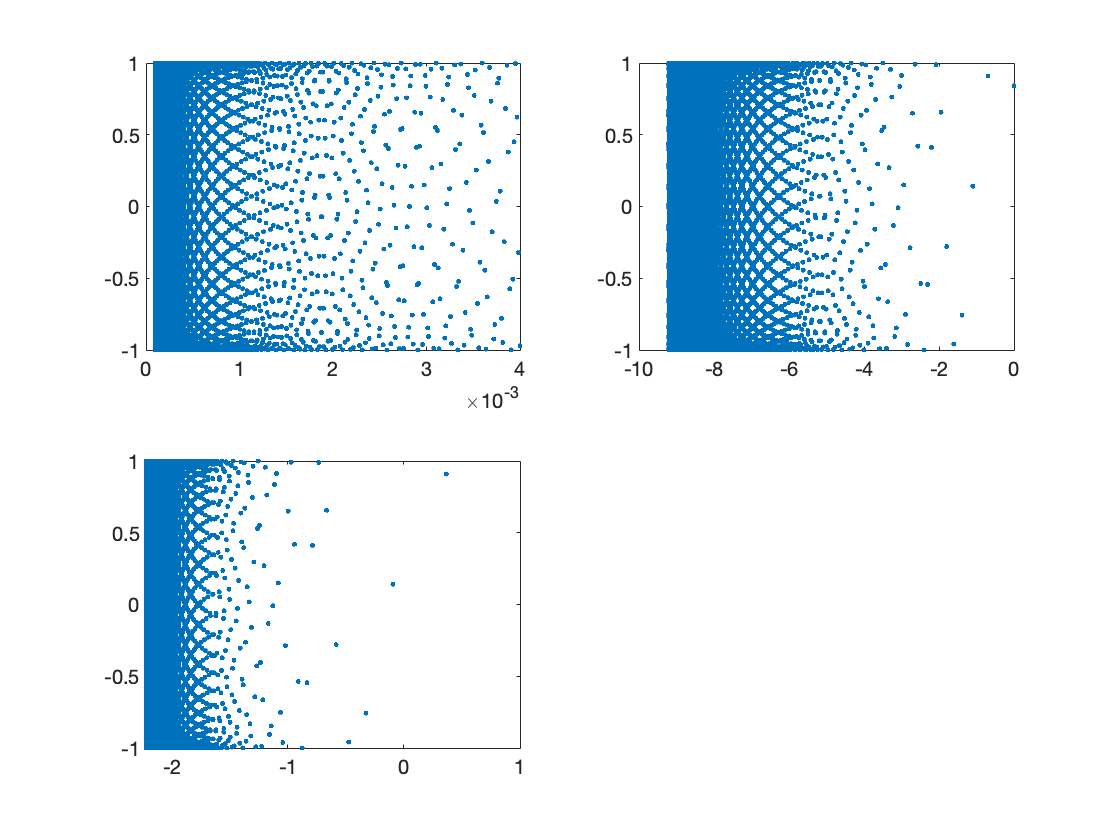

In [17]:
n = 1:10000;
x = 1./n;
y = sin(n);

subplot(2,2,1)
plot(x,y,'.')
axis([0, 4*10^(-3), -1,1]);

subplot(2,2,2)
plot(log(x),y,".")
subplot(2,2,3)
plot(-log(abs(log(x))),y,".")
hold off;

The pattern doesn't get lost when:
* scaled
* treated with $\log$

I'm hoping any TA would do me a favor and give me some keywords on this topic, really interesting...

In [12]:
clear all;

## Q 1.3

### Question

#### Task 1

**Calculate the value of $\large\int_{1}^{2} \dfrac{1}{x} dx$.**

* Calculate darboux upper and lower sums ($\Sigma_n, \sigma_n$) with $n = 10^m(m=3,4,5,6)$ subintervals, and their average
* Analyze the convergence of $\Sigma_n, \sigma_n$, guess the value of $\large\int_{1}^{2} \dfrac{1}{x} dx$.
* Calculate the value of $\large\int_{1}^{2} \dfrac{1}{x} dx$ and compare the result with the value you guess.

#### Task 2

Draw graph of $S(x) = \large\int_{1}^{x} \dfrac{1}{t} \mathop{dt}$, calculate it's root, and discuss it's relationship with natural log $e$.


------

### Solution

#### Task 1

n = 1000
lower_sum = 0.692897, upper_sum = 0.693397
average = 0.693147
error = 0.000000

n = 10000
lower_sum = 0.693122, upper_sum = 0.693172
average = 0.693147
error = 0.000000

n = 100000
lower_sum = 0.693145, upper_sum = 0.693150
average = 0.693147
error = 0.000000

n = 1000000
lower_sum = 0.693147, upper_sum = 0.693147
average = 0.693147
error = 0.000000

n = 10000000
lower_sum = 0.693147, upper_sum = 0.693147
average = 0.693147
error = 0.000000



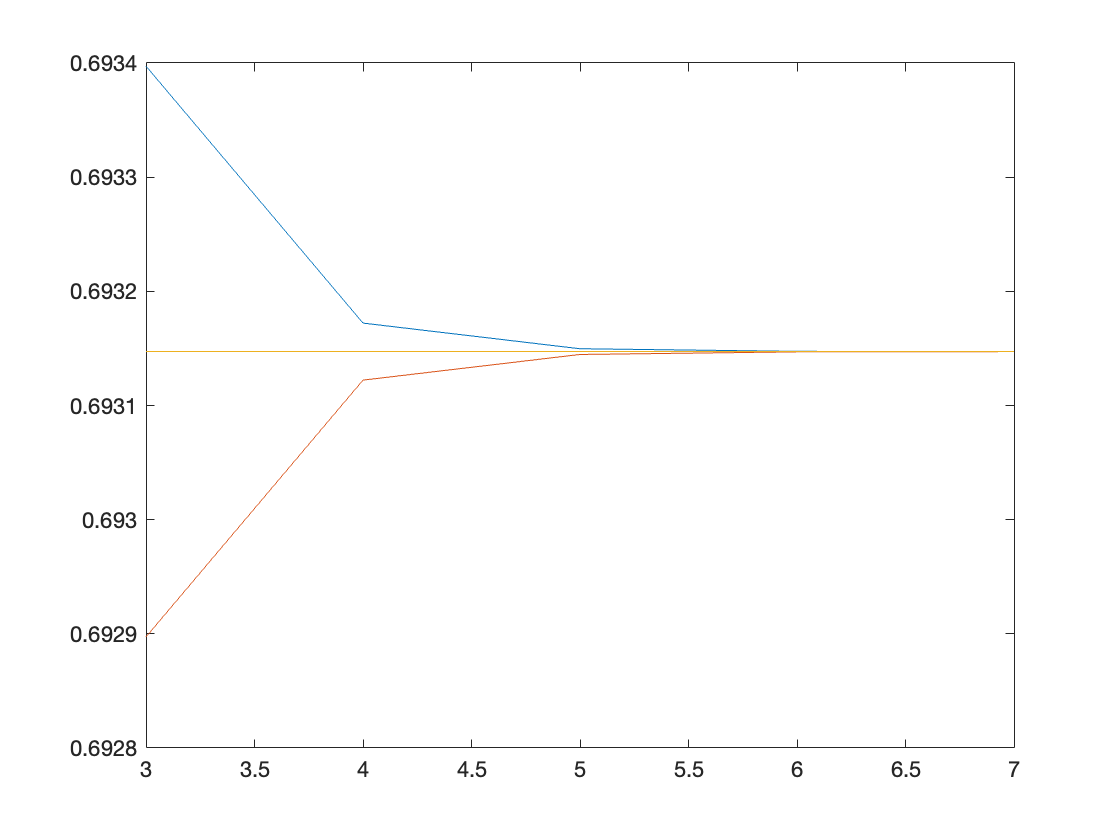

In [21]:
range=3:7;
lower_sums=[];
upper_sums=[];

for m=range
    n=10^m;
    lower_sum = 0;
    upper_sum = 0;

    for k=0:n-1
        lower_sum = lower_sum + (1/(n+k+1));
        upper_sum = upper_sum + (1/(n+k));
    end

    average = (lower_sum + upper_sum)/2;
    fprintf('n = %d\n', n);
    error = abs(average - log(2));
    fprintf('lower_sum = %f, upper_sum = %f\n', lower_sum, upper_sum);
    fprintf('average = %f\n', average);
    fprintf('error = %f\n\n', error);
    lower_sums = [lower_sums, lower_sum];
    upper_sums = [upper_sums, upper_sum];
end

subplot(1,1,1)

plot(range, upper_sums);
hold on;
plot(range, lower_sums);
plot(range, zeros(length(range),1) + log(2));
hold off;

#### Task 2

In [23]:
syms s x
S = int(1/s, s, 1, x);

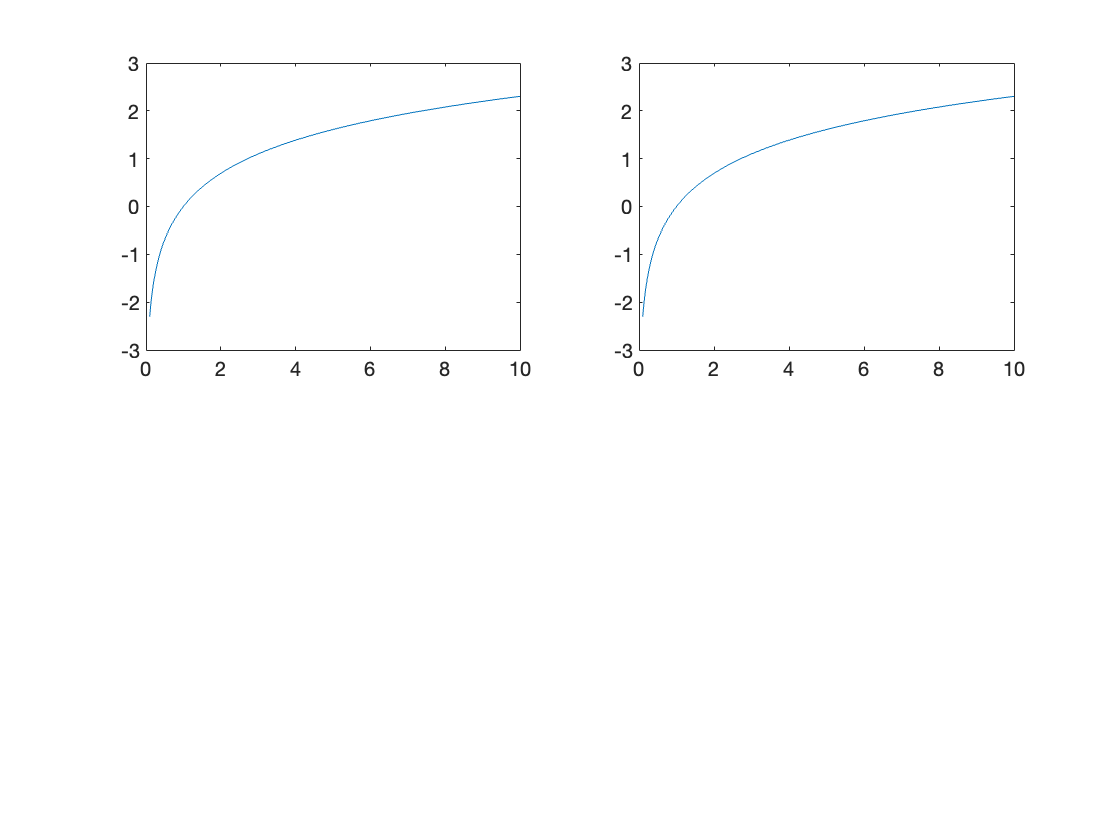

In [24]:
a = 0.1:0.01:10;
b = double(subs(S, x, a));

subplot(2,2,1)
plot(a,b);
subplot(2,2,2)
plot(a, log(a));

It's easy to see $S(x) \equiv \ln x$, so the root of $S(x)$ is $1$:

In [52]:
steps=20;
delta=1e-3;

div = @(t) 1/t;
newton_iteration = @(x_n) x_n - log(x_n) * x_n;

x=3.0;
for c=1:steps
    x = round(newton_iteration(x), 50);
end
fprintf('$x_0$ = %.50f\n', x);

$x_0$ = 1.00000000000000000000000000000000000000000000000000
